In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Capacity (%)": [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10],
    "3S Voltage (V)": [12.60, 12.45, 12.33, 12.24, 12.06, 11.94, 11.85, 11.73, 11.61, 11.55, 
                    11.52, 11.46, 11.40, 11.37, 11.31, 11.25, 11.19, 11.13, 11.07]
}

df = pd.DataFrame(data)
print(df)

    Capacity (%)  3S Voltage (V)
0            100           12.60
1             95           12.45
2             90           12.33
3             85           12.24
4             80           12.06
5             75           11.94
6             70           11.85
7             65           11.73
8             60           11.61
9             55           11.55
10            50           11.52
11            45           11.46
12            40           11.40
13            35           11.37
14            30           11.31
15            25           11.25
16            20           11.19
17            15           11.13
18            10           11.07


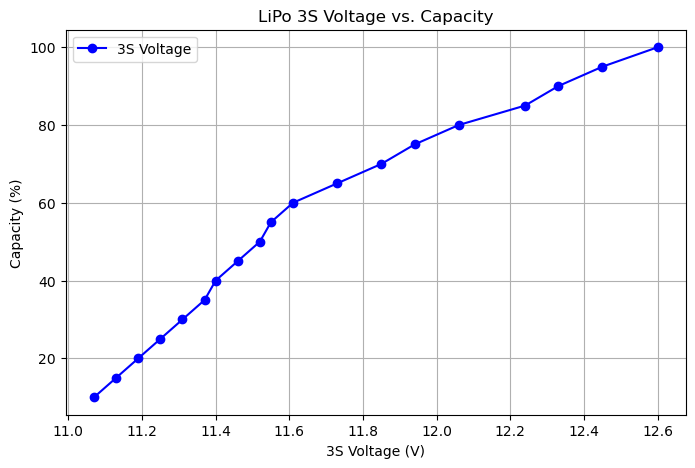

In [32]:
# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(df["3S Voltage (V)"], df["Capacity (%)"], marker='o', linestyle='-', color='b', label="3S Voltage")

# Formatting the plot
plt.ylabel("Capacity (%)")
plt.xlabel("3S Voltage (V)")
plt.title("LiPo 3S Voltage vs. Capacity")
plt.grid(True)
plt.legend()

In [33]:
y_train = df[['Capacity (%)']].values
X_train = df[['3S Voltage (V)']].values

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Train Data with Poly Linear Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_train_poly)

In [34]:
mse_test = np.mean((y_train - y_pred)**2)
print("MSE: ", mse_test)

MSE:  3.9278224153208745


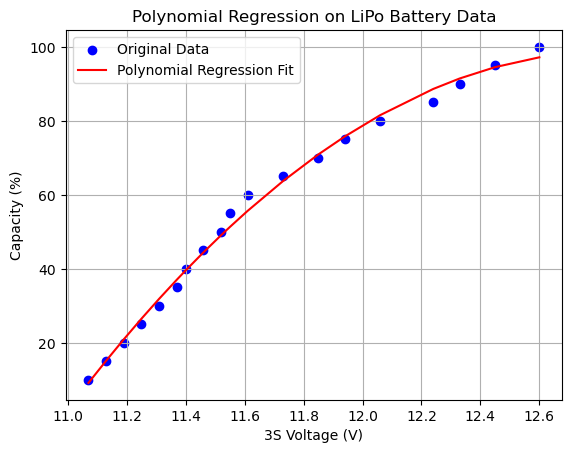

In [35]:
# Plot original data points
plt.scatter(df['3S Voltage (V)'], df['Capacity (%)'], color='blue', label='Original Data')

# Plot the polynomial regression curve
plt.plot(X_train, y_pred, color='red', label='Polynomial Regression Fit')

# Labels and legend
plt.ylabel('Capacity (%)')
plt.xlabel('3S Voltage (V)')
plt.title('Polynomial Regression on LiPo Battery Data')
plt.legend()
plt.grid(True)

In [36]:
coefficients = model.coef_[0]  # Coefficients of the polynomial
intercept = model.intercept_[0]  # Intercept

poly_equation = "y = " + " + ".join([f"{coeff:.5f} * x^{i}" for i, coeff in enumerate(coefficients)])
poly_equation += f" + {intercept:.5f}"

print(poly_equation)


y = 0.00000 * x^0 + 740.78596 * x^1 + -28.86639 * x^2 + -4653.88293
